# Airbnb (SQLite)

## City of Bristol, England

In [67]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("Airbnb\Import from CSV.db")
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,calendar,calendar,2,"CREATE TABLE `calendar` (\n\t`listing_id`\t,\n..."
1,table,listings,listings,5960,"CREATE TABLE `listings` (\n\t`id`\t,\n\t`listi..."
2,table,neighbourhoods,neighbourhoods,8371,CREATE TABLE `neighbourhoods` (\n\t`neighbourh...
3,table,reviews,reviews,8372,"CREATE TABLE `reviews` (\n\t`listing_id`\t,\n\..."
4,table,summary_reviews,summary_reviews,12812,CREATE TABLE `summary_reviews` (\n\t`listing_i...
5,table,summary_listings,summary_listings,13193,"CREATE TABLE `summary_listings` (\n\t`id`\t,\n..."


In [68]:
q2 = '''
SELECT 
    id, host_id, neighbourhood_cleansed AS neighbourhood,property_type, room_type,CAST(accommodates AS integer) accommodates,CAST(bathrooms AS integer) number_of_bathrooms,CAST(bedrooms AS integer) number_of_bedrooms,CAST(REPLACE(price,"$","")AS real) price,
    CAST(minimum_nights AS integer) min_nights,has_availability AS availability,CAST(availability_365 AS integer) availability_360, CAST(number_of_reviews AS integer) number_of_reviews, CAST(review_scores_rating AS integer) review_scores_rating
FROM listings 
LIMIT 5
'''
pd.read_sql_query(q2, conn)

,id,host_id,neighbourhood,property_type,room_type,accommodates,number_of_bathrooms,number_of_bedrooms,price,min_nights,availability,availability_360,number_of_reviews,review_scores_rating
0,70820,360195,Windmill Hill,Townhouse,Private room,2,1,1,27.0,2,t,8,113,96
1,117122,591555,Clifton,Apartment,Private room,4,2,1,65.0,1,t,362,111,99
2,146407,708175,Southville,House,Private room,3,1,1,38.0,2,t,10,51,90
3,220956,1145941,Bedminster,Apartment,Entire home/apt,2,1,1,59.0,1,t,213,66,94
4,307634,1582810,Easton,Townhouse,Private room,2,1,1,28.0,2,t,225,11,93


## EDA

#### Types of rooms

In [69]:
q3 = '''
SELECT DISTINCT (room_type)
FROM listing_clean
'''
pd.read_sql_query(q3, conn)

,room_type
0,Private room
1,Entire home/apt
2,Shared room


#### Types of property

In [70]:
q4= '''
SELECT DISTINCT(property_type)
FROM listing_clean
'''
pd.read_sql_query(q4, conn)

,property_type
0,Townhouse
1,Apartment
2,House
3,Guesthouse
4,Bed and breakfast
5,Hostel
6,Loft
7,Guest suite
8,Tent
9,Cabin


In [71]:
q5='''
SELECT id, room_type,neighbourhood, price
FROM listing_clean
ORDER BY price DESC
LIMIT 10
'''
pd.read_sql_query(q5, conn)

,id,room_type,neighbourhood,price
0,16615504,Entire home/apt,Hotwells & Harbourside,800.0
1,17405811,Entire home/apt,Ashley,799.0
2,21823868,Entire home/apt,Hotwells & Harbourside,768.0
3,10585756,Entire home/apt,Redland,750.0
4,23161370,Entire home/apt,Henbury & Brentry,725.0
5,24228345,Entire home/apt,Ashley,600.0
6,18565235,Entire home/apt,Easton,550.0
7,20785798,Entire home/apt,Hotwells & Harbourside,500.0
8,21570772,Entire home/apt,Central,500.0
9,341227,Entire home/apt,Ashley,450.0


#### Hotwells & Harbourside is the home of the most expensive home to rent with the price of 800 dollars a night for the entire home/apt. Ashley is the second by 799 dollars a month. 

In [72]:
q6='''
SELECT id, room_type,neighbourhood, ROUND(AVG(price),0) avg_price
FROM listing_clean
GROUP BY neighbourhood
ORDER BY avg_price ASC
'''
pd.read_sql_query(q6, conn)

,id,room_type,neighbourhood,avg_price
0,24549663,Private room,Stockwood,25.0
1,21172518,Entire home/apt,Southmead,28.0
2,23991868,Private room,Hartcliffe & Withywood,30.0
3,24628648,Entire home/apt,St George West,37.0
4,24592452,Private room,Hengrove & Whitchurch Park,38.0
5,24401982,Entire home/apt,Bishopsworth,39.0
6,24591949,Entire home/apt,St George Central,39.0
7,23451480,Private room,Frome Vale,44.0
8,24212234,Entire home/apt,Brislington East,45.0
9,24722526,Private room,St George Troopers Hill,45.0


#### Hotwells and Harbourside is the most expensive neighbourhood with the average price of 115 dollars. Stockwood with the average price of 25 dollars is the cheapest neighbourhood. 

In [73]:
q7= '''
SELECT neighbourhood, ROUND(AVG(review_scores_rating), 0) avg_rating, ROUND(AVG(price),0) avg_price, SUM(number_of_reviews) 
FROM listing_clean
GROUP BY neighbourhood
ORDER BY avg_rating DESC
'''
pd.read_sql_query(q7, conn)

,neighbourhood,avg_rating,avg_price,SUM(number_of_reviews)
0,Southmead,92.0,28.0,348
1,Bishopsworth,89.0,39.0,366
2,Clifton,87.0,84.0,5986
3,St George West,87.0,37.0,473
4,Hillfields,83.0,57.0,300
5,Easton,82.0,52.0,3004
6,Hotwells & Harbourside,82.0,115.0,3300
7,St George Central,82.0,39.0,449
8,Stoke Bishop,82.0,88.0,507
9,Brislington West,81.0,58.0,675


#### Southmead  with average rating of 92/100, average price of 28 dollars per night and 348 review seems to be the most popular neighbourhood in Bristol. Hartcliffe & Withywood with the average rating of 41/100, average price of 30 dollars per night and 12 reviews seems to be the least popular neighbourhood. 

In [91]:
q8='''
SELECT listing_id,DATE(date) date,available
FROM calendar
WHERE available IS NOT NULL
LIMIT 10
'''
pd.read_sql_query(q8, conn)

,listing_id,date,available
0,21248567,2019-05-16,f
1,21248567,2019-05-15,f
2,21248567,2019-05-14,f
3,21248567,2019-05-13,f
4,21248567,2019-05-12,f
5,21248567,2019-05-11,f
6,21248567,2019-05-10,f
7,21248567,2019-05-09,f
8,21248567,2019-05-08,f
9,21248567,2019-05-07,f


In [100]:
q17='''
select strftime('%m', date) as Month
from calendar
GROUP BY 1
'''
pd.read_sql_query(q17, conn)

,Month
0,01
1,02
2,03
3,04
4,05
5,06
6,07
7,08
8,09
9,10


In [75]:
q9 = '''
SELECT min(price) min_price, max(price) max_price, 
min(review_scores_rating) lowest_rating, max(review_scores_rating) highest_rating
from listing_clean
'''
pd.read_sql_query(q9, conn)

,min_price,max_price,lowest_rating,highest_rating
0,0.0,800.0,0,100


### Outliers

In [76]:
q10 = '''
SELECT *
FROM listing_clean
WHERE price == (SELECT min(price) FROM listing_clean);
'''
pd.read_sql_query(q10, conn)

,id,host_id,neighbourhood,property_type,room_type,accommodates,number_of_bathrooms,number_of_bedrooms,price,min_nights,availability,availability_360,number_of_reviews,review_scores_rating
0,18212791,47649976,Knowle,Apartment,Private room,2,1,1,0.0,1,t,0,2,100
1,20598718,16495483,Brislington West,Apartment,Entire home/apt,6,1,2,0.0,1,t,165,74,95
2,22642671,7925710,Cotham,Apartment,Entire home/apt,3,1,0,0.0,2,t,2,6,90


In [77]:
q11 = '''
SELECT *
FROM listing_clean
WHERE review_scores_rating == (SELECT min(review_scores_rating) FROM listing_clean);
'''
pd.read_sql_query(q11, conn)

,id,host_id,neighbourhood,property_type,room_type,accommodates,number_of_bathrooms,number_of_bedrooms,price,min_nights,availability,availability_360,number_of_reviews,review_scores_rating
0,853819,4474160,Ashley,House,Private room,2,0,1,62.0,21,t,365,0,0
1,914833,4910757,Eastville,House,Private room,3,1,1,70.0,2,t,362,0,0
2,1205652,6585968,Frome Vale,Apartment,Private room,2,2,1,24.0,3,t,89,0,0
3,1608917,8568332,Bishopsworth,Bed and breakfast,Private room,2,1,1,22.0,5,t,0,0,0
4,2213560,9170903,Eastville,House,Private room,2,1,1,55.0,1,t,365,0,0
5,3171080,3039024,Ashley,House,Private room,1,1,1,30.0,14,t,0,1,0
6,3960179,20522861,Avonmouth & Lawrence Weston,House,Entire home/apt,5,1,3,99.0,3,t,180,1,0
7,4415577,14393496,Clifton Down,Apartment,Entire home/apt,4,1,1,35.0,1,t,0,6,0
8,4474040,23213540,Westbury-on-Trym & Henleaze,House,Private room,1,1,1,55.0,1,t,365,0,0
9,5884754,22532990,Brislington East,House,Private room,1,1,1,40.0,1,t,365,0,0


### Histogram

C:\Users\ParsaG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018044B94390>,
      dtype=object)

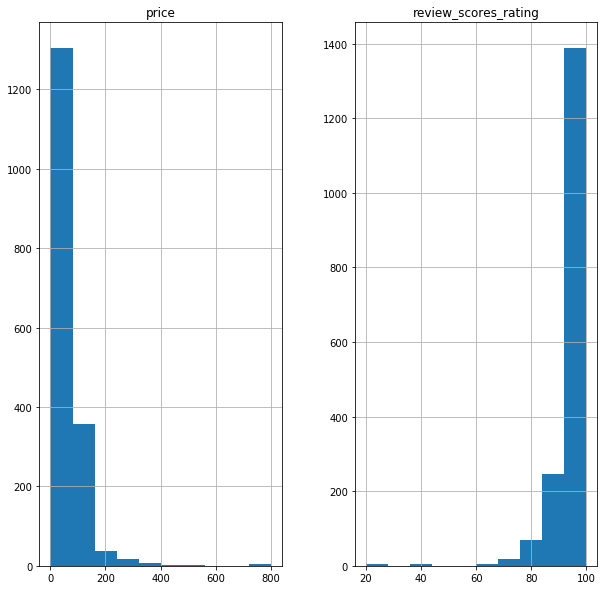

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)

q12 = '''
SELECT price, review_scores_rating
FROM listing_clean
WHERE price != (SELECT min(price) FROM listing_clean)
AND review_scores_rating != (SELECT min(review_scores_rating) FROM listing_clean);
'''
pd.read_sql_query(q12, conn).hist(ax=ax)

### Neighbourhoods with highest ratings and availability

In [79]:
q13 ='''
SELECT neighbourhood, availability_360
FROM listing_clean
GROUP BY neighbourhood
HAVING review_scores_rating>98
ORDER BY availability_360 DESC
LIMIT 10
'''
pd.read_sql_query(q13, conn)

,neighbourhood,availability_360
0,St George West,129
1,Frome Vale,89
2,Avonmouth & Lawrence Weston,78
3,Bishopsworth,23
4,Southmead,0


In [80]:
q14 = '''
SELECT neighbourhood, price, review_scores_rating
FROM listing_clean
WHERE price != (SELECT min(price) FROM listing_clean)
AND review_scores_rating != (SELECT min(review_scores_rating) FROM listing_clean)
GROUP BY neighbourhood
ORDER BY review_scores_rating, price ASC
LIMIT 10;
'''
pd.read_sql_query(q14, conn)

,neighbourhood,price,review_scores_rating
0,Cotham,135.0,60
1,Knowle,25.0,80
2,Eastville,50.0,80
3,Hartcliffe & Withywood,20.0,90
4,Hengrove & Whitchurch Park,28.0,90
5,Hillfields,40.0,90
6,St George Central,50.0,90
7,Stoke Bishop,130.0,93
8,Henbury & Brentry,725.0,93
9,Stockwood,21.0,95


#### Finding cheapest time to stay in Bristol based on the month of the year and the neighbourhood.

In [128]:
q15= '''

SELECT strftime('%m', date) Month, neighbourhood, ROUND(AVG(listing_clean.price),0) avg_price
FROM   listing_clean 
JOIN 
    calendar 
ON
    listing_clean.id = calendar.listing_id
GROUP BY 1,2
ORDER BY avg_price ASC
'''
pd.read_sql_query(q15, conn)

,Month,neighbourhood,avg_price
0,01,Stockwood,25.0
1,02,Stockwood,25.0
2,03,Stockwood,25.0
3,04,Stockwood,25.0
4,05,Stockwood,25.0
5,06,Stockwood,25.0
6,07,Stockwood,25.0
7,08,Stockwood,25.0
8,09,Stockwood,25.0
9,10,Stockwood,25.0
